In [1]:
import sedaro
import yaml
import json
import matplotlib.pyplot as plt
import pandas as pd

# optional
import sweetviz as sv

/usr/local/lib/python3.11/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/usr/local/lib/python3.11/site-packages/visions/backends/shared/nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit


# Important: Read Before Running

This notebook makes changes to agent and scenario branches indicated in the settings section. Ensure any changes to the target branches are saved prior to running this code. Sedaro recommends committing current changes and creating new branches in the target repositories to avoid loss of work.

This notebook also requires that you have previously generated an API key in the web UI. That key should be stored in a file called `secrets.json` in the same directory as this notebook with the following format:

```json
{
    "API_KEY": "<API_KEY>"
}
```

API keys grant full access to your repositories and should never be shared. If you think your API key has been compromised, you can revoke it in the user settings interface on the Sedaro website.

In [4]:
Sedaro_api_host  = "http://localhost:80" # "api.sedaro.com"
secretPath = '/Users/sedaro/Documents/sedaro/sedaro-satellite/secrets.json'
with open(secretPath, 'r') as file:
    Sedaro_api_token = json.load(file)['API_KEY']

sedaroAPI = sedaro.SedaroApiClient(api_key=Sedaro_api_token, host=Sedaro_api_host)

In [163]:
scenario_branch_id = "PKNxCWQL8N3cR5CG7YS6X3"
wildfire_scenario_branch = sedaroAPI.scenario(scenario_branch_id)

In [164]:
wildfire_agent_branch_id = 'PKNxCTjFd3mBD3QlYM5W5F'
wildfire_vehicle_agent_branch = sedaroAPI.agent_template(wildfire_agent_branch_id)

In [23]:
tg =  wildfire_vehicle_agent_branch.TargetGroup.get_first()
tg_id = tg.id # <<< or target group id

In [ ]:
# make target group for the CFG block

In [67]:
cf_target_group_id = 'PKSmYkqHX3bQJ47rYSqWfF'

In [48]:
wildfire_vehicle_agent_branch.CloudFractionGroupToScalarCondition

BlockType(CloudFractionGroupToScalarCondition, branch=PKNxCTjFd3mBD3QlYM5W5F)

In [68]:
myCfCondition = wildfire_vehicle_agent_branch.CloudFractionGroupToScalarCondition.create(
  name='CF_group_condition_test',
  targetGroup=cf_target_group_id, 
  tgParam='PREDICTED_CLOUD_FRACTION',
  relationship='GREATER',
  scalar=0.3)

In [69]:
myCfCondition


CloudFractionGroupToScalarCondition(
   cloudFractionGroup=None
   cloudFractionTargetCompliance=None
   compliance=None
   countRelationship=None
   countValue=None
   groupRoller='ANY'
   id='PKSmcyc3Q45fMchYjwJM7L'
   isFilter=None
   name='CF_group_condition_test'
   relationship='GREATER'
   scalar=0.3
   targetCompliance=None
   targetGroup='PKSmYkqHX3bQJ47rYSqWfF'
   terminator=False
   tgParam='PREDICTED_CLOUD_FRACTION'
   type='CloudFractionGroupToScalarCondition'
)

In [70]:
myCfBlockedCondition = wildfire_vehicle_agent_branch.CloudFractionGroupToScalarCondition.create(
  name='CF_group_IS_CLOUD_BLOCKED_condition_test',
  targetGroup=cf_target_group_id, 
  tgParam='IS_CLOUD_BLOCKED',
  relationship='EQUAL',
  scalar=False)

In [88]:
myCfBlockedCondition


CloudFractionGroupToScalarCondition(
   cloudFractionGroup=None
   cloudFractionTargetCompliance=None
   compliance=None
   countRelationship=None
   countValue=None
   groupRoller='ANY'
   id='PKSmd7bTCy92RlCNSsC63s'
   isFilter=None
   name='CF_group_IS_CLOUD_BLOCKED_condition_test'
   relationship='EQUAL'
   scalar=False
   targetCompliance=None
   targetGroup='PKSmYkqHX3bQJ47rYSqWfF'
   terminator=False
   tgParam='IS_CLOUD_BLOCKED'
   type='CloudFractionGroupToScalarCondition'
)

In [72]:
cfg_EIGHTDAY_1x1deg_CLOUD = wildfire_vehicle_agent_branch.CloudFractionGroup.create(
    name='Cloud_fraction_EIGHTDAY_1x1deg',
    normalvariateSigma=0.10,
    cloudLayerAltitude={'km':9.0},
    defaultCloudfractionValue=0.50,
    geoAreaDatetimeTargetGroup=cf_target_group_id)
    

In [136]:
cfg_EIGHTDAY_1x1deg_CLOUD


CloudFractionGroup(
   cloudFractionGroupResults={}
   cloudLayerAltitude={'km': 9.0}
   dataset=4
   defaultCloudfractionValue=0.5
   filterConditions=[]
   geoAreaDatetimeTargetGroup='PKSmYkqHX3bQJ47rYSqWfF'
   id='PKSmpmwbT3v8FtLwHWTS6d'
   name='Cloud_fraction_EIGHTDAY_1x1deg'
   normalvariateSigma=0.1
   type='CloudFractionGroup'
)

In [149]:
wildfire_vehicle_agent_branch.CloudFractionGroup.get_all()

[
 CloudFractionGroup(
    cloudFractionGroupResults={}
    cloudLayerAltitude={'km': 9.0}
    dataset=4
    defaultCloudfractionValue=0.5
    filterConditions=[]
    geoAreaDatetimeTargetGroup='PKSmYkqHX3bQJ47rYSqWfF'
    id='PKSmpmwbT3v8FtLwHWTS6d'
    name='Cloud_fraction_EIGHTDAY_1x1deg'
    normalvariateSigma=0.1
    type='CloudFractionGroup'
 )]

In [89]:
myCfBlockedCondition.update(cloudFractionGroup = cfg_EIGHTDAY_1x1deg_CLOUD.id)


CloudFractionGroupToScalarCondition(
   cloudFractionGroup='PKSmpmwbT3v8FtLwHWTS6d'
   cloudFractionTargetCompliance=None
   compliance=None
   countRelationship=None
   countValue=None
   groupRoller='ANY'
   id='PKSmd7bTCy92RlCNSsC63s'
   isFilter=None
   name='CF_group_IS_CLOUD_BLOCKED_condition_test'
   relationship='EQUAL'
   scalar=False
   targetCompliance=None
   targetGroup='PKSmYkqHX3bQJ47rYSqWfF'
   terminator=False
   tgParam='IS_CLOUD_BLOCKED'
   type='CloudFractionGroupToScalarCondition'
)

In [90]:
myCfCondition.update(cloudFractionGroup = cfg_EIGHTDAY_1x1deg_CLOUD.id)


CloudFractionGroupToScalarCondition(
   cloudFractionGroup='PKSmpmwbT3v8FtLwHWTS6d'
   cloudFractionTargetCompliance=None
   compliance=None
   countRelationship=None
   countValue=None
   groupRoller='ANY'
   id='PKSmcyc3Q45fMchYjwJM7L'
   isFilter=None
   name='CF_group_condition_test'
   relationship='GREATER'
   scalar=0.3
   targetCompliance=None
   targetGroup='PKSmYkqHX3bQJ47rYSqWfF'
   terminator=False
   tgParam='PREDICTED_CLOUD_FRACTION'
   type='CloudFractionGroupToScalarCondition'
)

In [150]:
wildfire_agent = wildfire_scenario_branch.Agent.get("NT06aqHUT5djI1_JPAsck")

In [151]:
wildfire_agent #PKSmpmwbT3v8FtLwHWTS6d   PKSmYkqHX3bQJ47rYSqWfF


Agent(
   differentiatingState={}
   externalState=[]
   id='NT06aqHUT5djI1_JPAsck'
   name='Wildfire'
   orbit='NT06alVRg9PCnSV4yQ9aV'
   path=None
   peripheral=False
   targetGroupMapping={'NT08XthUqifGQ8cUDtZk-': {'associatedTargetGroups': ['NT-gzNsR9XIipaCAF2hvF']}, 'NT08_XVROe2Va_eBgCK2k': {'associatedTargetGroups': ['NT-gucwTh1uB2n5LFj92F']}, 'NTKAJurTrHOKg99QP6Hpk': {'associatedTargetGroups': ['PKSmYkqHX3bQJ47rYSqWfF', 'NTKAO1cREDpGEm8yUjFlF']}}
   targetMapping={'NT074oHRqqXQPLoTOHQl-': {'associatedTargets': ['NTKBtVLSQa0nR-czw3uL-']}, 'NT0LLnQRA9be3moDIgAq-': {'associatedTargets': ['NYU1Sl9SJXxW4kwQ7h24-']}, 'NT0LWIfSJ1RIenKpUmJEV': {'associatedTargets': ['NYcdwKoUmX6JMt84OwhdV']}, 'NT0LhZuRIm7Cfvs0RFvW-': {'associatedTargets': ['NYcdzEdUYXpvrrVgfIcRV']}, 'NT0Ln1gS8elWEK4Y-l7m-': {'associatedTargets': ['NYce19JSr1-UwArEhWKLF']}}
   templateRef='PKNxCTjFd3mBD3QlYM5W5F'
   type='Agent'
)

In [173]:
sim = wildfire_scenario_branch.simulation

In [174]:
simulation_handle = sim.start()

In [175]:
simulation_handle.results_poll()

SedaroSimulationResult(branch=PKNxCWQL8N3cR5CG7YS6X3, status=SUCCEEDED)

In [ ]:
The field "isFilter" on CloudFractionGroupToScalarCondition(name="CF_group_condition_test" id=PKSmcyc3Q45fMchYjwJM7L) must point to "CloudFractionGroup" not "TargetGroup".

In [176]:
cf_results = simulation_handle.results()

In [177]:
cf_results.agent('Wildfire').summarize() 

---------------------------------------------------------------------------
                            Agent Result Summary                           
                                 'Wildfire'                                
---------------------------------------------------------------------------
🧩 Simulated Modules
    • Guidance, Navigation, & Control
    • Command & Data Handling
    • Power
    • Thermal

📦 Available Blocks
    ----------------------------------------------------------
    |                  id                         name       |
    ----------------------------------------------------------
    | root                       |                           |
    | YddJw9jfT-IveoP86XQjA      | <Unnamed Block>           |
    | PKSmpmwbT3v8FtLwHWTS6d     | Cloud_fraction_EIGHTDAY_1 |
    | PKSmYkqHX3bQJ47rYSqWfF     | CloudFractionTargets      |
    | NdIPXBHRGPHHj0nN2QnQV      | Communication Chassis <>  |
    | NdIPSoVRyPSGOI4p_2Wx-      | Communication Chassis <

In [179]:
cloudFractionResults = cf_results.agent('Wildfire').block('PKSmpmwbT3v8FtLwHWTS6d')#.summarize() 

In [197]:
cloudFractionResults.summarize()

---------------------------------------------------------------------------
                   Sedaro Simulation Block Result Summary                  
                      'Cloud_fraction_EIGHTDAY_1x1deg'                     
---------------------------------------------------------------------------
🧩 Simulated Modules
    • Command & Data Handling

📋 Variables Available
    • cloudFractionGroupResults
---------------------------------------------------------------------------
❓ Query variables with .<VARIABLE_NAME>
📊 Display all block variables statistics with .stats( output_html=False ) 


In [181]:
cloudFractionResults.cloudFractionGroupResults.summarize()

---------------------------------------------------------------------------
                      Sedaro Simulation Series Summary                     
                        'cloudFractionGroupResults'                        
---------------------------------------------------------------------------
📈 2976 points covering 494.5 minutes with ~10.0s steps

📑 This series has subseries.

🗂️ Value data types are:
    - 'NT074oHRqqXQPLoTOHQl-': 'str'
    - 'NTKAFyiU_9oo2dw6nTZzk': 'str'
---------------------------------------------------------------------------
❓ Index [<SUBSERIES_NAME>] to select a subseries


In [182]:
cloudFractionResults.cloudFractionGroupResults['NT074oHRqqXQPLoTOHQl-'].summarize()

---------------------------------------------------------------------------
                      Sedaro Simulation Series Summary                     
             'cloudFractionGroupResults.NT074oHRqqXQPLoTOHQl-'             
---------------------------------------------------------------------------
📈 2976 points covering 494.5 minutes with ~10.0s steps

📑 This series has subseries.

🗂️ Value data types are:
    - 'isCloudBlocked': 'bool'
    - 'actualCloudFractionPercent': 'float'
    - 'cloudLayerIntersection_alt': 'float'
    - 'cloudLayerIntersection_lat': 'float'
    - 'cloudLayerIntersection_lon': 'float'
    - 'predictedCloudFractionPercent': 'float'
---------------------------------------------------------------------------
❓ Index [<SUBSERIES_NAME>] to select a subseries


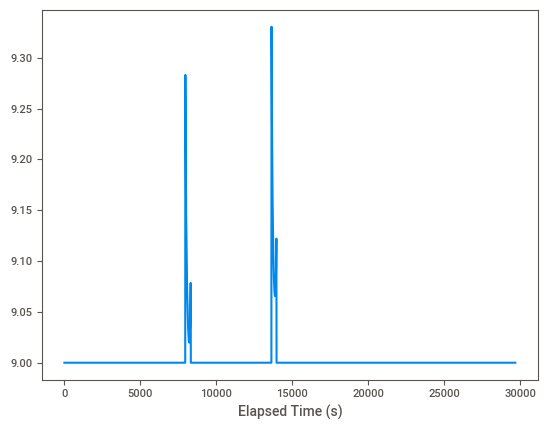

In [211]:
cloudFractionResults.cloudFractionGroupResults['NT074oHRqqXQPLoTOHQl-']['cloudLayerIntersection_alt'].plot()

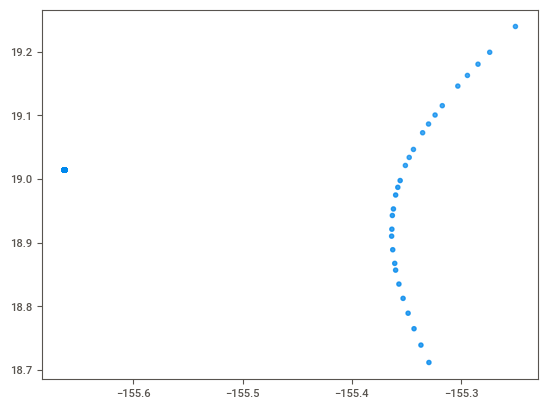

In [210]:

first, second = 0, -1
groundTarget = 'NTKAFyiU_9oo2dw6nTZzk'

lons = cloudFractionResults.cloudFractionGroupResults.values[groundTarget]['cloudLayerIntersection_lon'][first:second]
lats = cloudFractionResults.cloudFractionGroupResults.values[groundTarget]['cloudLayerIntersection_lat'][first:second]
alts = cloudFractionResults.cloudFractionGroupResults.values[groundTarget]['cloudLayerIntersection_alt'][first:second]
cf   = cloudFractionResults.cloudFractionGroupResults.values[groundTarget]['actualCloudFractionPercent'][first:second]
plt.scatter( list(map(lambda x:x, lons)), list(map(lambda x:x,lats)),  alpha=cf)

In [209]:
cloudFractionResults.cloudFractionGroupResults.values.keys()

dict_keys(['NT074oHRqqXQPLoTOHQl-', 'NTKAFyiU_9oo2dw6nTZzk'])

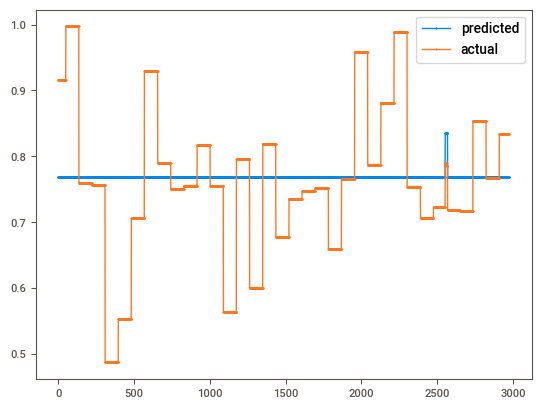

In [213]:
predicted = cloudFractionResults.cloudFractionGroupResults.NTKAFyiU_9oo2dw6nTZzk.predictedCloudFractionPercent.values[0:-1]
actual    = cloudFractionResults.cloudFractionGroupResults.NTKAFyiU_9oo2dw6nTZzk.actualCloudFractionPercent.values[0:-1]    
plt.plot(predicted[0:], marker='.', markersize=1, linewidth=1, label = "predicted")
plt.plot(actual[0:], marker='.', markersize=1, linewidth=1, label = "actual")
plt.legend()
plt.show()

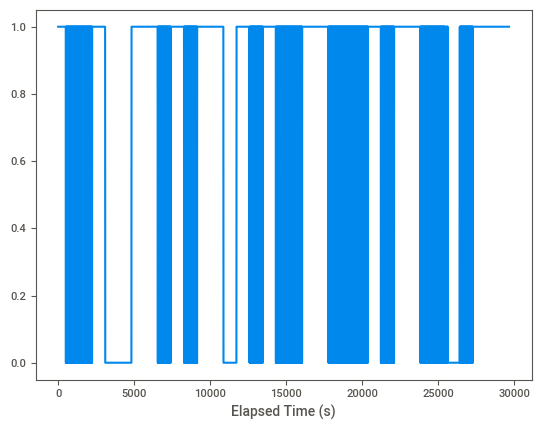

In [218]:
cloudFractionResults.cloudFractionGroupResults['NTKAFyiU_9oo2dw6nTZzk']['isCloudBlocked'].plot()

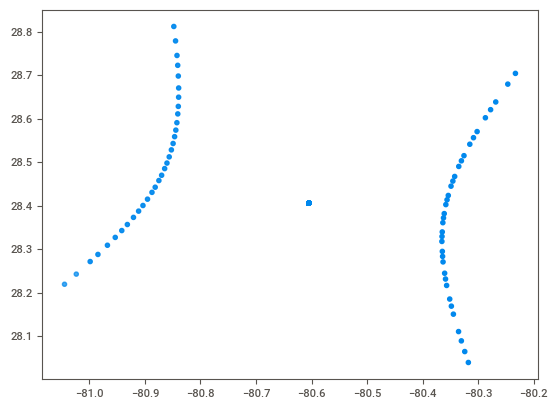

In [214]:

first, second = 0, -1
groundTarget = 'NT074oHRqqXQPLoTOHQl-'

lons = cloudFractionResults.cloudFractionGroupResults.values[groundTarget]['cloudLayerIntersection_lon'][first:second]
lats = cloudFractionResults.cloudFractionGroupResults.values[groundTarget]['cloudLayerIntersection_lat'][first:second]
alts = cloudFractionResults.cloudFractionGroupResults.values[groundTarget]['cloudLayerIntersection_alt'][first:second]
cf   = cloudFractionResults.cloudFractionGroupResults.values[groundTarget]['actualCloudFractionPercent'][first:second]
plt.scatter( list(map(lambda x:x, lons)), list(map(lambda x:x,lats)),  alpha=cf)

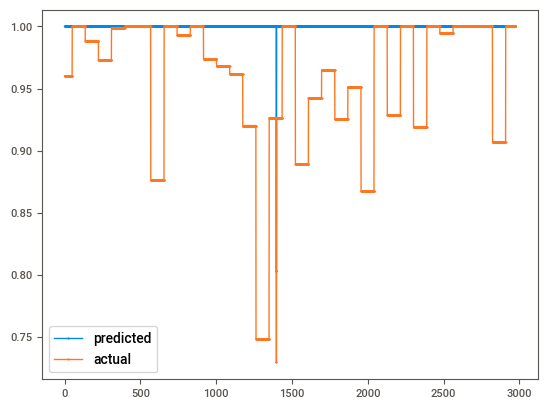

In [216]:
predicted = cloudFractionResults.cloudFractionGroupResults['NT074oHRqqXQPLoTOHQl-'].predictedCloudFractionPercent.values[0:-1]
actual    = cloudFractionResults.cloudFractionGroupResults['NT074oHRqqXQPLoTOHQl-'].actualCloudFractionPercent.values[0:-1]    
plt.plot(predicted[0:], marker='.', markersize=1, linewidth=1, label = "predicted")
plt.plot(actual[0:], marker='.', markersize=1, linewidth=1, label = "actual")
plt.legend()
plt.show()

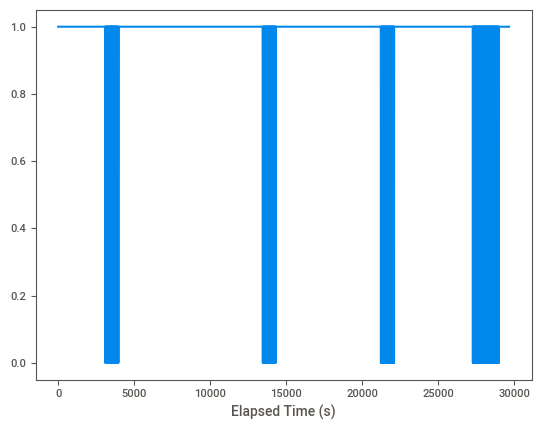

In [217]:
cloudFractionResults.cloudFractionGroupResults['NT074oHRqqXQPLoTOHQl-']['isCloudBlocked'].plot()

In [112]:
data = simulation_handle.results_plain()

In [129]:
len(data['series']['NT06aqHUT5djI1_JPAsck/1'][0])

2976